# Linking discretized RgL plane with conformations of IDPs

When bound to its partner, the protein PUMA behaves as a structured protein, presenting an alpha-helical structure. However, in isolatation, PUMA does not seem to have a well defined structure, i.e., it behaves as an intrinsically disordered protein (IDP). The isolated PUMA protein is then used to investigate how the hubs in the discretized RgL plane relate (or not) to the possible IDP conformations. We want to investigate the energy characteristics of the most occupied hubs and typical conformations of different energy ranges.

For that, we build the RgL network parameters of PUMA and list of energies of the four most occupied bins:

In [2]:
from RgL2 import RgL

path='/home/belisa/Documents/PUMA_ext/3.2-wocmap/'
fin=path+'outtime_0.35_en.txt'
sysRgL=RgL(fin, lim=1000001, idx=3, dt=20, nhubs=4, energy=True, contacts=True, 
           compute_energy=True, compute_contacts=True)

Calculating binning parameters.
xmin =7, xmax=30, len_xbin=1.0361831039142766
ymin =4, ymax=96, len_ybin=9.392794930265122
Setting selHubIDs = np.arange(0,nhubs).
Hubs: [(3, 2), (4, 2), (4, 3), (3, 3)]


Then we save the network parameters in output files and generate the network graph:

Generating output files:
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_occupancy_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_bins_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_transitions_dt20_tp0.35.txt
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.eps
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.png


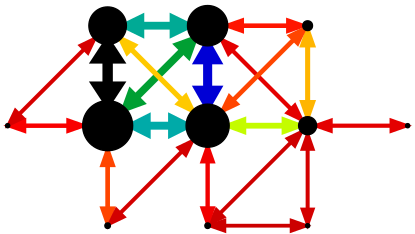

In [3]:
import ManageFile as mf
import GraphNetwork as gn
from IPython.display import Image

propname = ['occupancy', 'bins', 'transitions']
outname = [mf.set_output_name('PUMA', p, dt=20, tp=0.35, path=path, nhubs=4) for p in propname]
sysRgL.prop_to_file(propname, outname)
[occ_file, bins_file, trans_file] = outname
nwRgL = gn.graph(occ_file, trans_file, shift_color=0.8,
                 splines=True, ffac=0.05, facbothdir=0.8)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='eps', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='png', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname, fmt='png')
Image(graphname)

The network has four hubs (most occupied bins). Now we put axes and identify the hubs from 1 to 4, where 1 is the most occupied hub:

![](/3.2-wocmap/PUMA_network.png)

 The hubs have the corresponding energy distributions (median energies indicated by dotted lines):

Median energy value for hub 1:-61.4025
Median energy value for hub 2:-58.095
Median energy value for hub 3:-58.506
Median energy value for hub 4:-61.3185


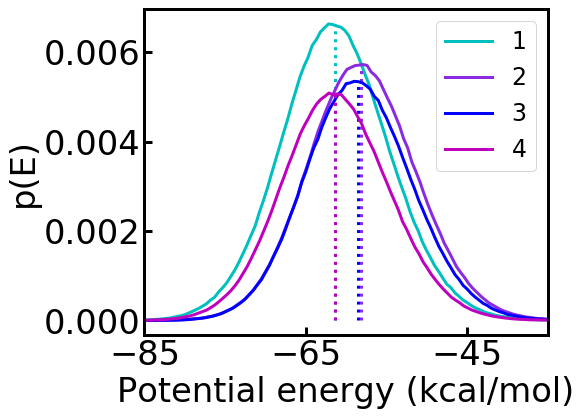

In [4]:
import numpy as np
import set_figure3 as setfig

def distribution(x, weights, bsize):
    xlen = max(x)-min(x)
    nbins = int(xlen/bsize)
    edges = np.linspace(min(x),max(x),nbins)
    H, edges = np.histogram(x, bins=edges, weights=weights)
    
    centers = np.array(edges) + bsize*0.5
    centers = centers[0:-1]
    listH = list(H.T)
    medx = np.median(x)
    
    return centers, listH, medx

colors = ['c', 'blueviolet', 'b', 'm', 'r']
medE = []
Emax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]               
    
    E = [1.5*c for (a,b,c) in sysRgL.Elist[i]] #1.5 factor for units in kcal/mol
    weights = np.ones_like(E)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, medE = distribution(E, weights, bsize=0.5)
    
    maxH = max(listH)
    vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
    xline = [medE]*len(vline)    
    sbpl.plot(centers, listH, linewidth=3, label=str(i+1), color=color)
    sbpl.plot(xline, vline, ':', linewidth=3, color=color)
    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=-85, xmax=-35, xstep_tick=20,
                          xlabel=r'Potential energy (kcal/mol)', ylabel=r'p(E)',
                         )
    print('Median energy value for hub '+str(i+1)+':'+str(medE))

figname=path+'Energy_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')

In order to investigate the link between the hubs and possible conformations, typical conformations corresponding to the low energy region (LER) and median energy region (MER) were analysed. As the energy distribution of the hubs have overlapping regions, similar conformations are found for different hubs, as shown below for the LER region:

![](/3.2-wocmap/PUMA_energy_confs.png)

Below, there are two movies corresponding to LER (left) and MER (right) conformations of hub 1, showing formed contacts. The criteria to build the contact map during the simulations was i,i+3. However, in the movies, only contacts that obbey the criteria i,i+5 are shown.

LER             |  MER
:-------------------------:|:-------------------------:
![alt text](/3.2-wocmap/hub1_e-75p7_traj34_ts298.gif)  |  ![alt text](/3.2-wocmap/hub1_e-56p329_traj17_ts72.gif)

The number of contacts for each case and criteria are below.

| - | i,i+3 | i,i+5 | 
| --- | --- | --- |
| LER | 72 | 50 |
| MER | 62 | 35 |

In order to have a better understanding of the contact formation for different energy ranges, the contact distributions of the hubs are computed below:

Median value of number of contacts for hub 1: 66.0
Median value of number of contacts for hub 2: 63.0
Median value of number of contacts for hub 3: 63.0
Median value of number of contacts for hub 4: 66.0


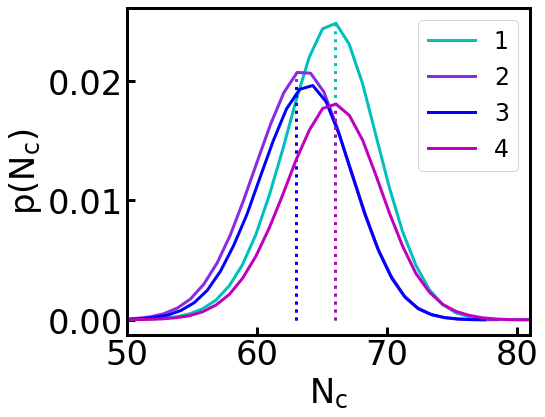

In [20]:
mednc = []
ncmax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]               
    
    nc = [c for (a,b,c) in sysRgL.nclist[i]]
    weights = np.ones_like(nc)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc, weights, bsize=1)
    
    maxH = max(listH)
    vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
    xline = [mednc]*len(vline) 
    sbpl.plot(centers, listH, linewidth=3, label=str(i+1), color=color)
    sbpl.plot(xline, vline, ':', linewidth=3, color=color)
    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=50, xmax=81, xstep_tick=10,
                          xlabel=r'N$_\mathrm{c}$', ylabel=r'p(N$_\mathrm{c}$)')
    print('Median value of number of contacts for hub '+str(i+1)+': '+str(mednc))

figname=path+'nc_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')